In [1]:
!pip install matplotlib


In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'Student_Performance.csv')


In [8]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
enc = encoder.fit_transform(df['Extracurricular Activities'])
df['Extracurricular Activities'] = enc


In [25]:
import pickle
pickle.dump(encoder,open('label_encoder.pkl','wb'))

In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [13]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [15]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


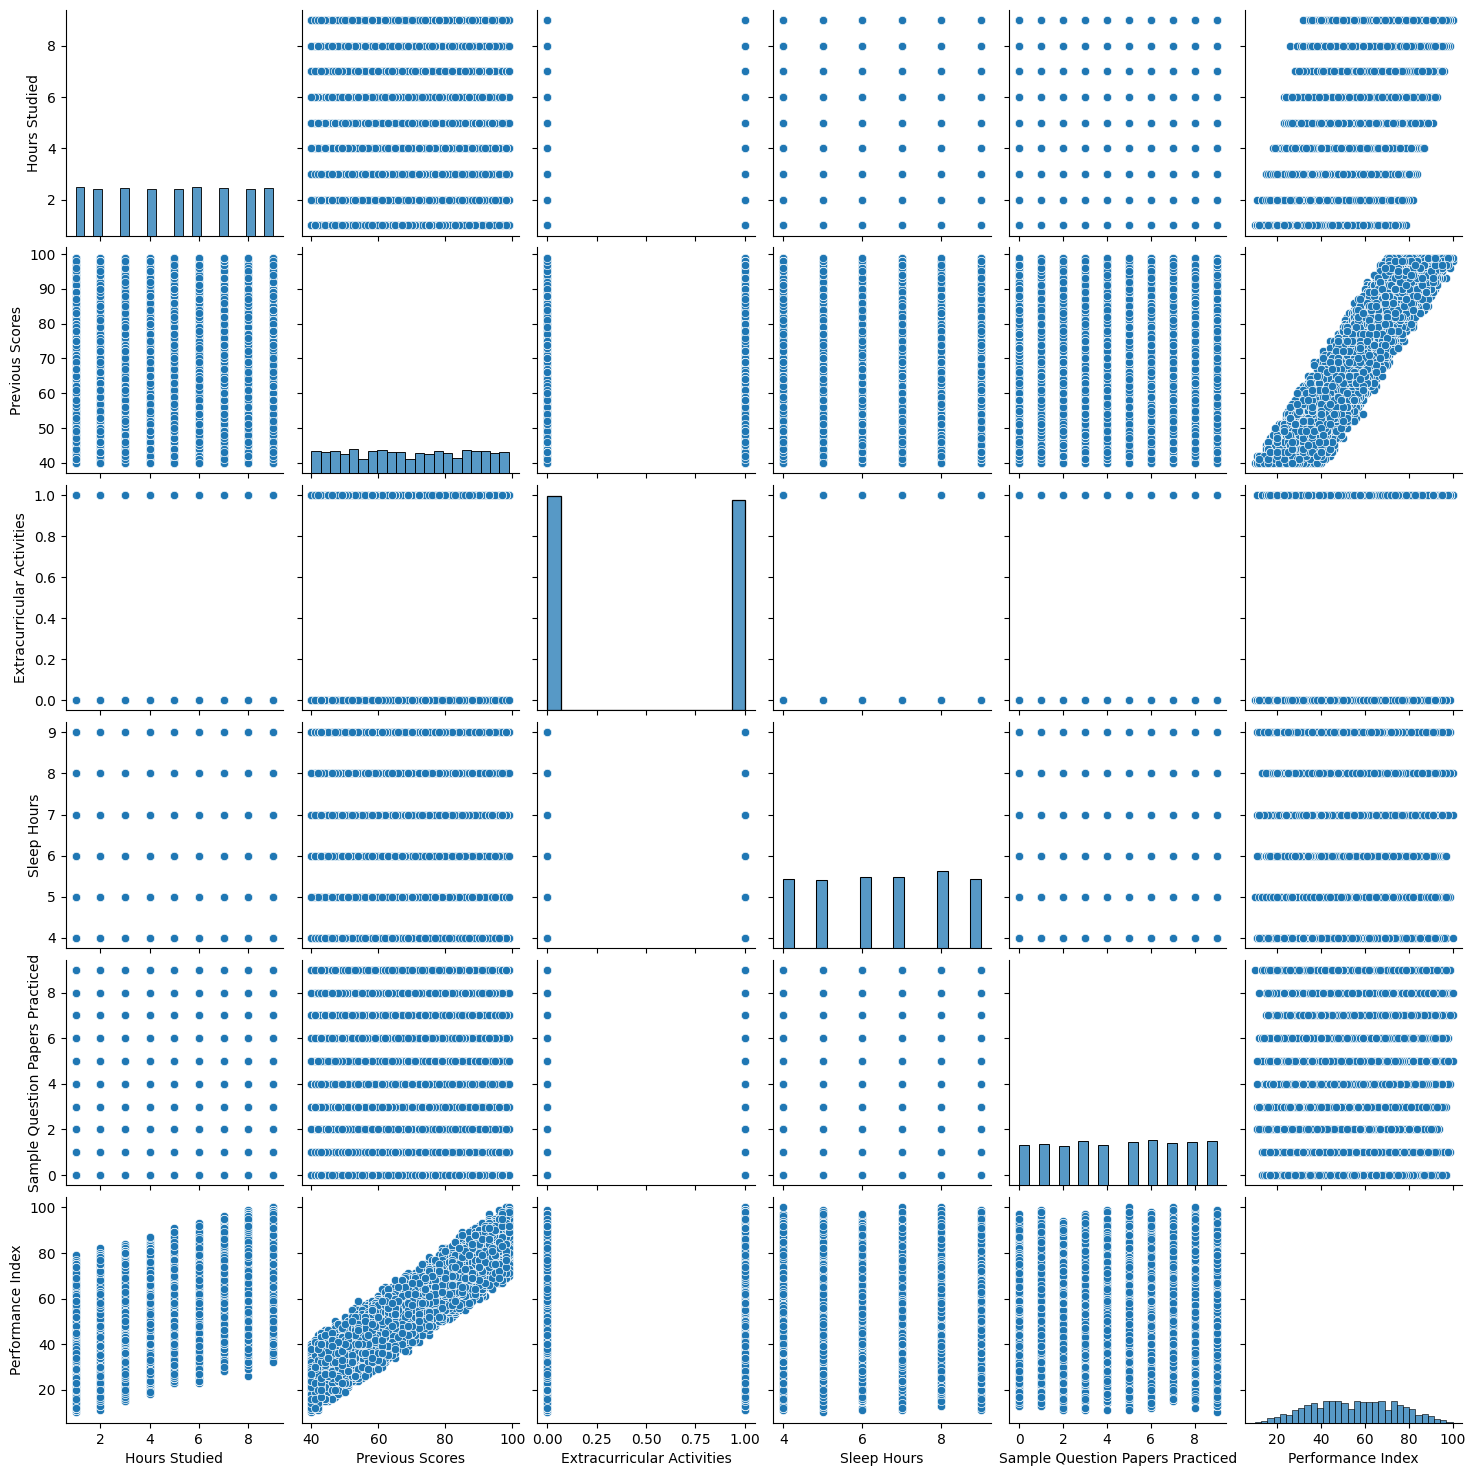

In [16]:
sns.pairplot(df)

Text(0, 0.5, 'Performance Index')

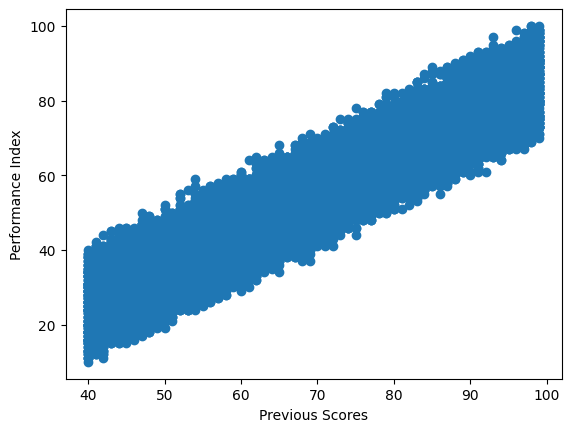

In [17]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

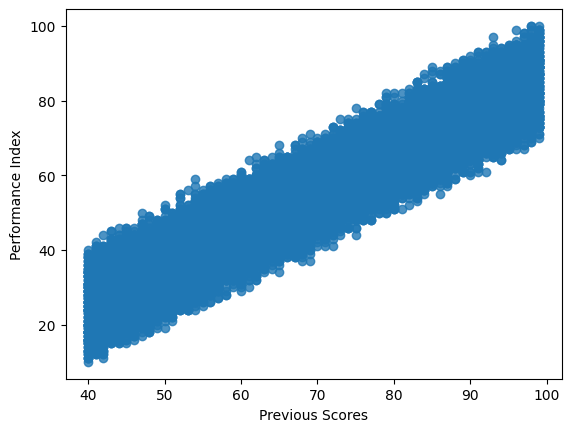

In [18]:
sns.regplot(x='Previous Scores', y='Performance Index', data = df)

In [19]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [20]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
Y = df['Performance Index']


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=42)

In [22]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(7000, 5) (3000, 5) (7000,) (3000,)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [24]:
import pickle
pickle.dump(scaler,open('scale.pkl','wb'))

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(xtrain, ytrain)


LinearRegression()

In [40]:
print(lr.coef_, lr.intercept_, lr.get_params())

[ 7.42276987 17.60827303  0.29080153  0.8138699   0.54598268] 55.39971428571428 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [42]:
ypred = lr.predict(xtest)
ypred[:5]

array([54.74728554, 22.61884434, 47.93665124, 31.34009865, 43.05974288])

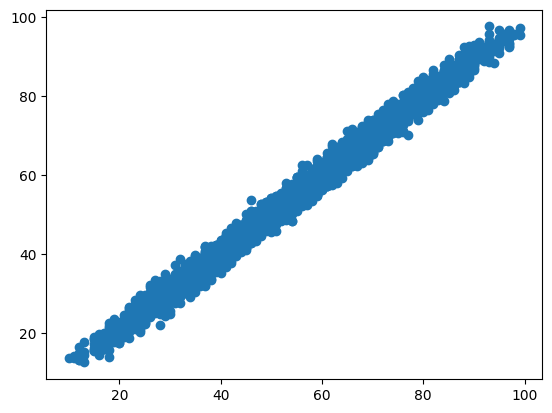

In [47]:

plt.scatter(ytest, ypred) 

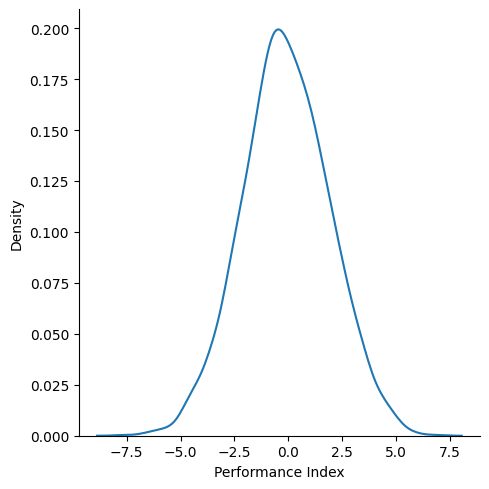

In [48]:
residual = ytest-ypred
sns.displot(residual,kind='kde')

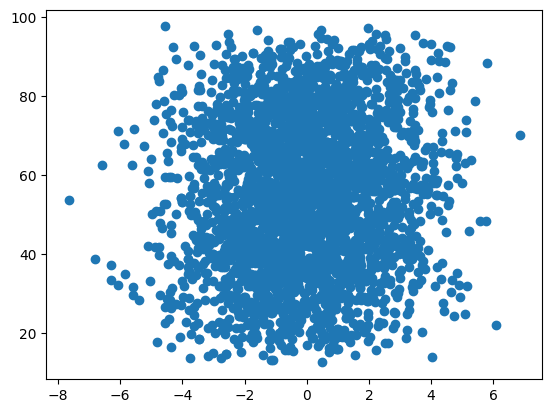

In [49]:
plt.scatter(residual, ypred)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(ytest, ypred))
print(mean_absolute_error(ytest, ypred))
print(np.sqrt(mean_squared_error(ytest, ypred)))

4.066563824092683
1.6090437564045224
2.016572295776346


In [52]:
from sklearn.metrics import r2_score

print(r2_score(ytest, ypred)*100)

98.90110607021137


For New Data Point Prediction

In [63]:
dp = X.iloc[0]
dp = dp.values.reshape(1,-1)
dp.shape

(1, 5)

In [64]:
dp_sc = scaler.transform(dp)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
lr.predict(dp_sc)

array([91.80177929])

Pickling the Model for Deployment :

In [66]:
import pickle

In [67]:
pickle.dump(lr, open('regmodel.pkl','wb'))

In [68]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [69]:
pickle_model.predict(dp_sc)

array([91.80177929])